In [46]:
import pandas as pd
pd.set_option('display.max_rows',500)
import numpy as np
from datetime import datetime
import subprocess
import os

## Github Csv Data

In [47]:

git_pull = subprocess.Popen( ['git','pull'] ,
                         cwd = os.path.dirname( '../data/raw/COVID-19/' ),
                         shell = True,
                         stdout = subprocess.PIPE,
                         stderr = subprocess.PIPE )
(out, error) = git_pull.communicate()


print("Error : " + str(error))
print("out : " + str(out))



Error : b'From https://github.com/CSSEGISandData/COVID-19\n   f3543055..5a4a5db4  web-data   -> origin/web-data\n'
out : b'Already up to date.\n'


In [48]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
jh_raw=pd.read_csv(data_path)

In [49]:
time_idx=jh_raw.columns[4:]
print(time_idx)

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '9/2/20', '9/3/20', '9/4/20', '9/5/20', '9/6/20', '9/7/20', '9/8/20',
       '9/9/20', '9/10/20', '9/11/20'],
      dtype='object', length=234)


In [50]:
df_plot=pd.DataFrame({'date':time_idx})

In [51]:
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [52]:
jh_raw[jh_raw['Country/Region']=='Germany'].iloc[:,4::]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20
130,0,0,0,0,0,1,4,4,4,5,...,247411,248840,250283,251058,251728,253626,254957,256433,258149,259735


In [53]:
country_list=['India','Italy','US','Germany']
for each in country_list:
    df_plot[each]=np.array(jh_raw[jh_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

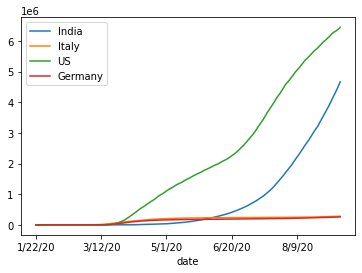

In [54]:
df_plot.set_index('date').plot()


In [55]:
datetime.strptime(df_plot.date[0],'%m/%d/%y') #converting into datetime format.

datetime.datetime(2020, 1, 22, 0, 0)

In [56]:
#converting into ISO datetime format.
time_idx=[datetime.strptime(each,'%m/%d/%y') for each in df_plot.date] 
time_str=[each.strftime("%Y-%m-%d") for each in time_idx] #ISO format.

In [57]:
time_str[:5]

['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26']

In [58]:
df_plot['date']=time_str

In [59]:
df_plot.head()

,date,India,Italy,US,Germany
0,2020-01-22,0,0,1,0
1,2020-01-23,0,0,1,0
2,2020-01-24,0,0,2,0
3,2020-01-25,0,0,2,0
4,2020-01-26,0,0,5,0


In [60]:
df_plot.to_csv(r'../data/processed/COVID_small_flat_table.csv',sep=';',index=False)

In [61]:

df_plot.head()

,date,India,Italy,US,Germany
0,2020-01-22,0,0,1,0
1,2020-01-23,0,0,1,0
2,2020-01-24,0,0,2,0
3,2020-01-25,0,0,2,0
4,2020-01-26,0,0,5,0
